# Team 22 (AIBM)

 <!-- ![](https://www.eomap.com/wp-content/uploads/2019/01/World_SM-1024x576.jpg) -->
<img class="image1" src="https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/info_block/public/media/images/chalkboardQWv3.png?itok=osJJwPW7" style="width:400px;height:200px"/>

import main library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# import the data

In [2]:
dataset = pd.read_csv('water_potability.csv')
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# over view your data

In [3]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Make preprocessing

visualization potability

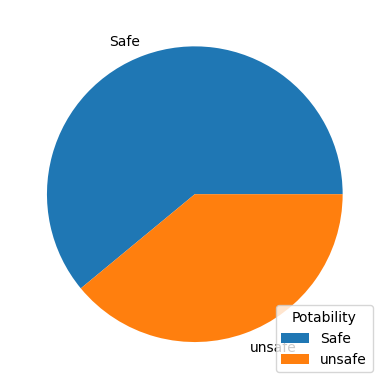

In [6]:
y = dataset['Potability']
d=dataset['Potability'].value_counts()
d=dict(d)
mylabels =  ["Safe","unsafe"]
plt.pie(d.values(), labels = mylabels)
plt.legend(title="Potability")

check outliers

<Axes: ylabel='ph'>

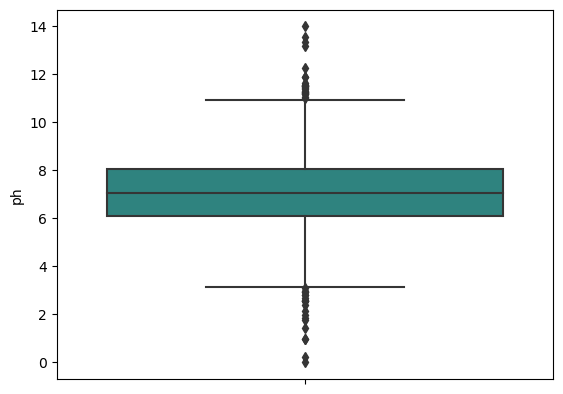

In [7]:
# col=['ph', 'Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
sns.boxplot( y='ph', data=dataset, palette='viridis')

# for i in range(0,10) :
#     sns.boxplot( y=col[i], data=dataset, palette='viridis')


<Axes: ylabel='Hardness'>

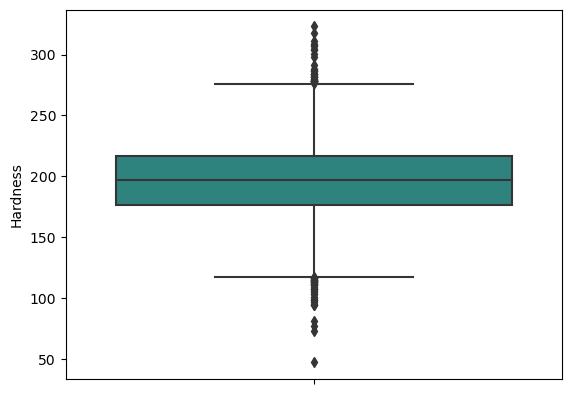

In [8]:
sns.boxplot( y='Hardness', data=dataset, palette='viridis')

<Axes: ylabel='Solids'>

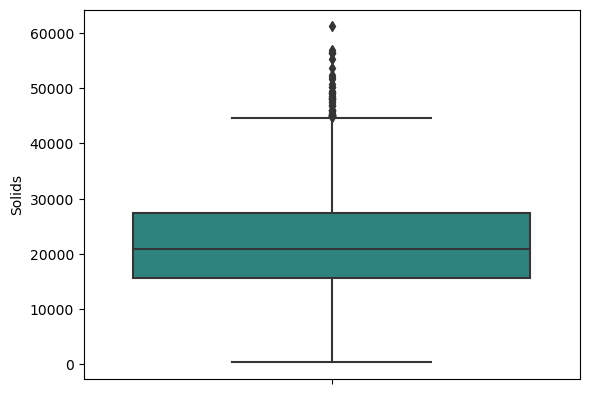

In [9]:
sns.boxplot( y='Solids', data=dataset, palette='viridis')

<Axes: ylabel='Chloramines'>

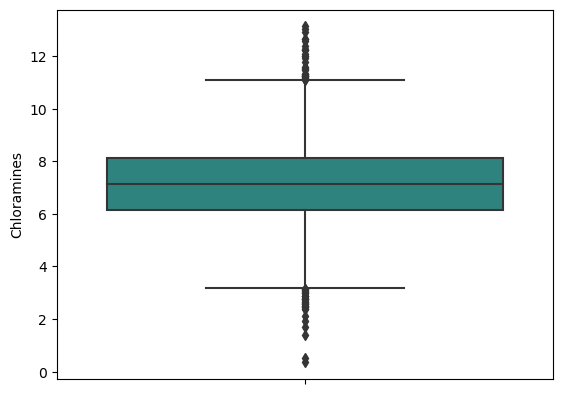

In [10]:
sns.boxplot( y='Chloramines', data=dataset, palette='viridis')

<Axes: ylabel='Sulfate'>

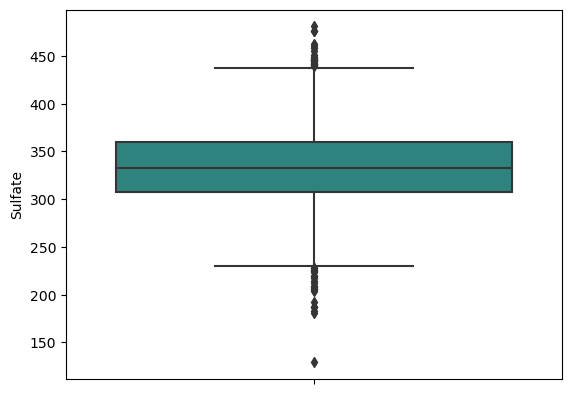

In [11]:
sns.boxplot( y='Sulfate', data=dataset, palette='viridis')

<Axes: ylabel='Conductivity'>

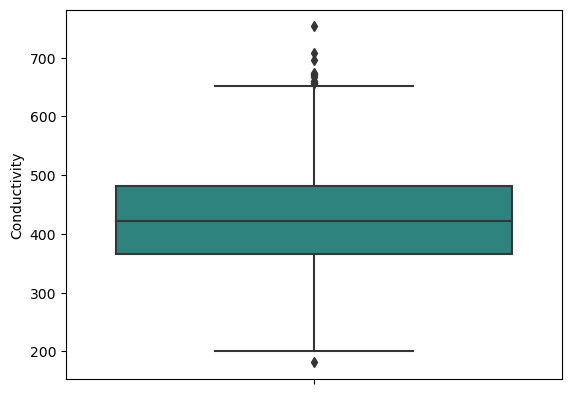

In [12]:
sns.boxplot( y='Conductivity', data=dataset, palette='viridis')

<Axes: ylabel='Organic_carbon'>

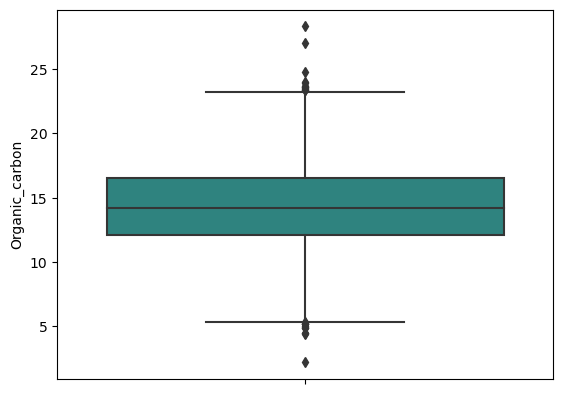

In [13]:
sns.boxplot( y='Organic_carbon', data=dataset, palette='viridis')

<Axes: ylabel='Trihalomethanes'>

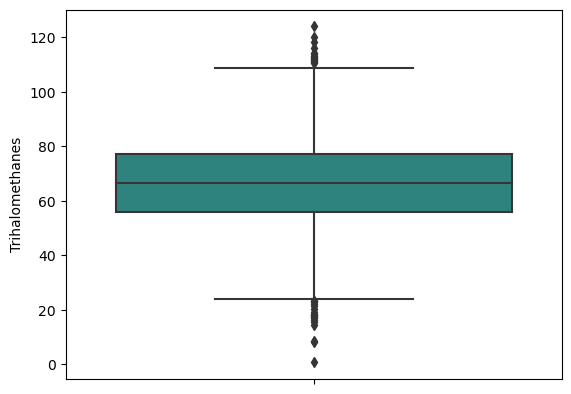

In [14]:
sns.boxplot( y='Trihalomethanes', data=dataset, palette='viridis')

<Axes: ylabel='Turbidity'>

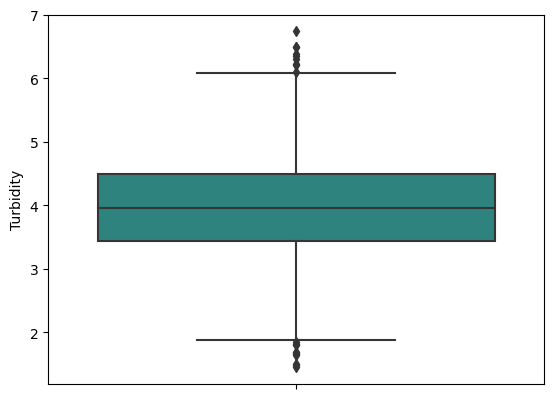

In [15]:
sns.boxplot( y='Turbidity', data=dataset, palette='viridis')

<Axes: ylabel='Potability'>

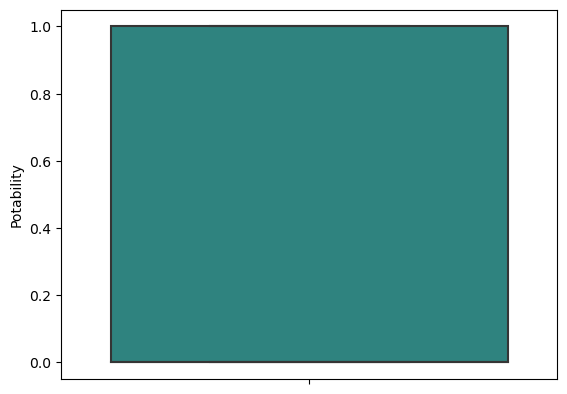

In [16]:
sns.boxplot( y='Potability', data=dataset, palette='viridis')

handel null data

In [17]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

handel null in ph

In [18]:
(dataset.ph.isnull().sum() / dataset.shape[0]) * 100

14.987789987789988

In [19]:
dataset['ph'].fillna( dataset['ph'].median() , inplace=True)

handel null in Sulfate

In [20]:
(dataset.Sulfate.isnull().sum() / dataset.shape[0]) * 100

23.84004884004884

In [21]:
dataset['Sulfate'].fillna( dataset['Sulfate'].median() , inplace=True)

handel null in Trihalomethanes

In [22]:
(dataset.Trihalomethanes.isnull().sum() / dataset.shape[0]) * 100

4.945054945054945

In [23]:
# dataset['Trihalomethanes'].dropna(inplace=True)
dataset['Trihalomethanes'].fillna( dataset['Trihalomethanes'].median() , inplace=True)

In [24]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Divide your data set to training and testing data

In [25]:
y=dataset['Potability']
X=dataset.drop(['Potability'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

# Implement the classification model

using Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
classifier = LogisticRegression(random_state = 0)

In [27]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred_Logistic = classifier.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred_Logistic)
cm

array([[501,   1],
       [317,   0]], dtype=int64)

In [30]:
cr=classification_report(y_test, y_pred_Logistic)
print(cr)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       502
           1       0.00      0.00      0.00       317

    accuracy                           0.61       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.38      0.61      0.47       819



In [31]:
accuracy_score_Logistic=accuracy_score(y_test, y_pred_Logistic)
accuracy_score_Logistic

0.6117216117216118

using kNN 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred_kNN=model.predict(X_test)
    accuracy_score_kNN=accuracy_score(y_test,y_pred_kNN)
    print(i,accuracy_score_kNN)
    


1 0.5238095238095238
2 0.5897435897435898
3 0.5421245421245421
4 0.5665445665445665
5 0.5384615384615384
6 0.575091575091575
7 0.5738705738705738
8 0.5665445665445665
9 0.5592185592185592
10 0.5811965811965812
11 0.5726495726495726
12 0.5885225885225885
13 0.5836385836385837
14 0.5897435897435898
15 0.575091575091575
16 0.5958485958485958
17 0.57997557997558
18 0.5995115995115995
19 0.5860805860805861


In [126]:
# accuracy_score_kNN=accuracy_score(y_test,y_pred_kNN)
# accuracy_score_kNN